In [2]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score



pd.pandas.set_option('display.max_columns', None)

In [3]:


data = pd.read_csv('./Data/houseprice.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# nous avons une variable Id, que nous ne devons pas utiliser pour les prédictions:

print('Number of House Id labels: ', len(data.Id.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House Id labels:  1460
Number of Houses in the Dataset:  1460


In [6]:
# trouver des variables catégorielles

categorical = [var for var in data.columns if data[var].dtype=='O']

print('Il existe {} variables catégorielles'.format(len(categorical)))

Il existe 43 variables catégorielles


In [7]:
# faites d'abord une liste des variables numériques
numerical = [var for var in data.columns if data[var].dtype!='O']

# liste de variables contenant des informations sur l'année
year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0, 0.5, 'prix médian des maisons')

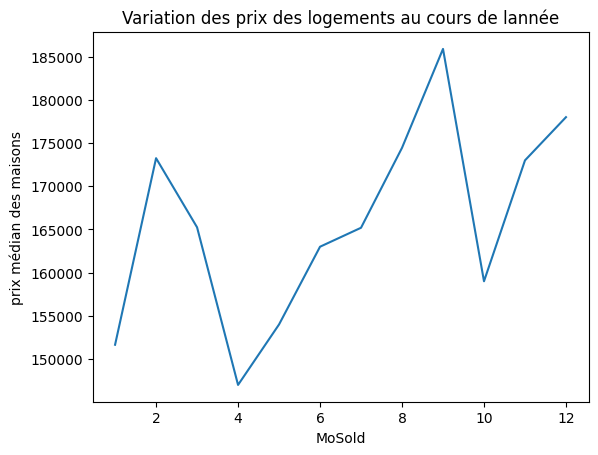

In [8]:
# prix médian d'une maison par mois au cours duquel elle a été vendue

data.groupby('MoSold')['SalePrice'].median().plot()
plt.title('Variation des prix des logements au cours de l''année')
plt.ylabel('prix médian des maisons')

In [9]:
# Le prix semble varier selon le mois au cours duquel la maison est vendue.

# Rechercher des variables discrètes
# Pour identifier les variables discrètes, je sélectionnerai parmi toutes les variables numériques, 
# celles qui contiennent un nombre fini et petit de valeurs distinctes. Voir ci-dessous.

discrete = []

for var in numerical:
    if len(data[var].unique()) < 20 and var not in year_vars:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
print()
print('Il existe {} variables discrètes'.format(len(discrete)))

MSSubClass  values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual  values:  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond  values:  [5 8 6 7 4 2 3 9 1]
BsmtFullBath  values:  [1 0 2 3]
BsmtHalfBath  values:  [0 1 2]
FullBath  values:  [2 1 3 0]
HalfBath  values:  [1 0 2]
BedroomAbvGr  values:  [3 4 1 2 0 5 6 8]
KitchenAbvGr  values:  [1 2 3 0]
TotRmsAbvGrd  values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces  values:  [0 1 2 3]
GarageCars  values:  [2 3 1 0 4]
PoolArea  values:  [  0 512 648 576 555 480 519 738]
MoSold  values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]

Il existe 14 variables discrètes


In [10]:
## Variables continues

# trouver des variables continues
# rappelons-nous de sauter la variable Id et la variable cible SalePrice
# qui sont également numériques

numerical = [var for var in numerical if var not in discrete and var not in [
    'Id', 'SalePrice'] and var not in year_vars]

print('Il existe {} variables numériques et continues'.format(len(numerical)))

Il existe 18 variables numériques et continues


In [11]:
## types de données

# les variables avec NA et le pourcentage de NA

for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


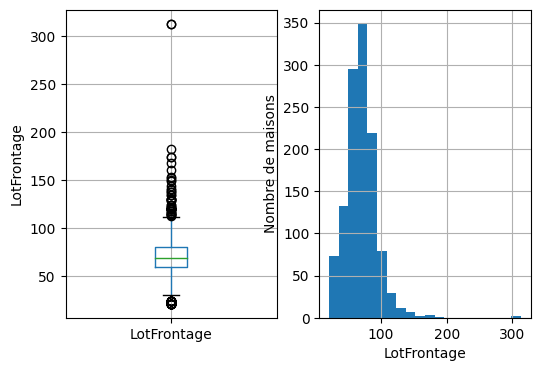

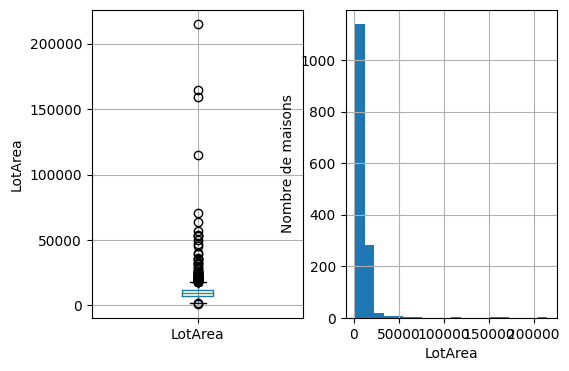

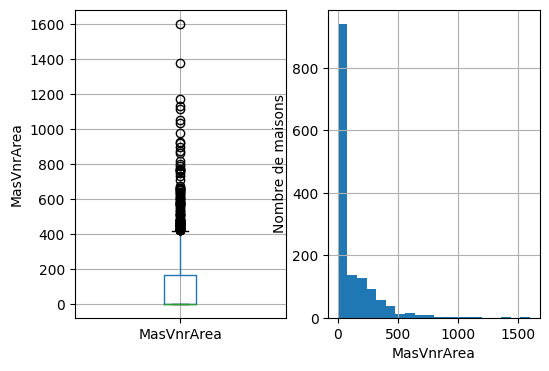

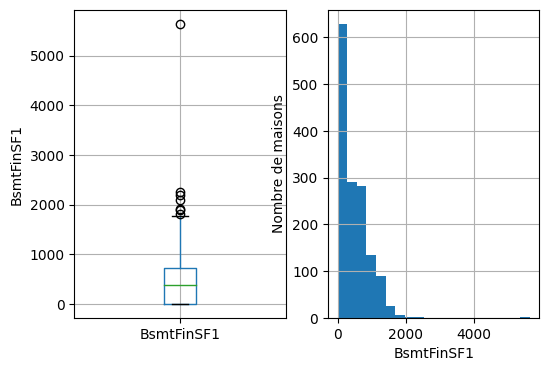

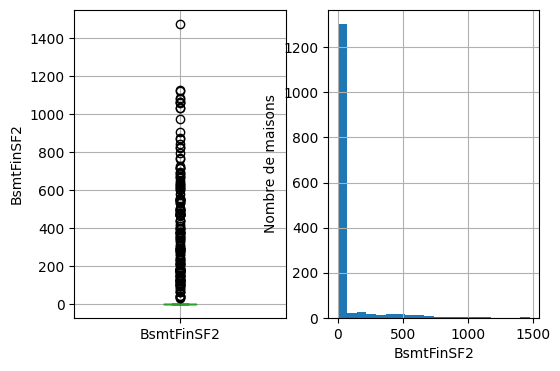

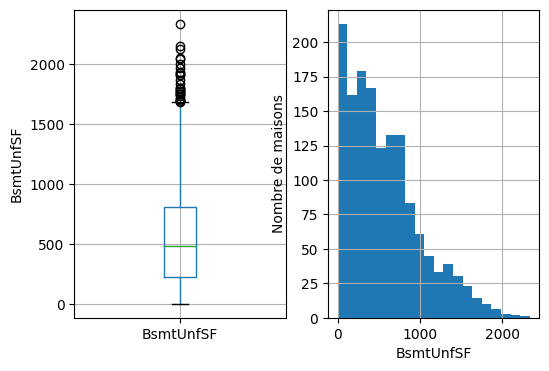

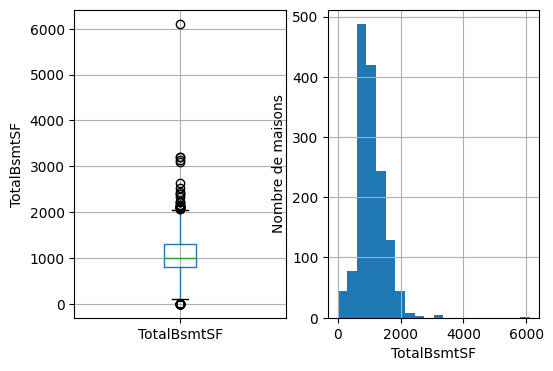

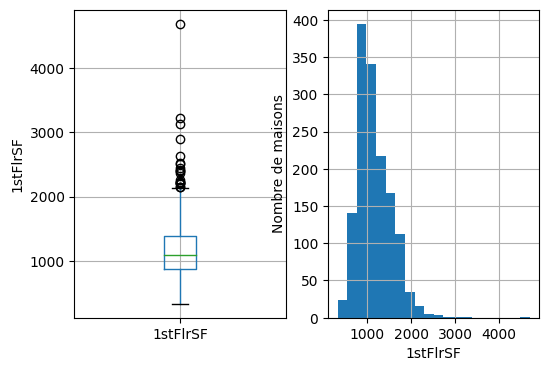

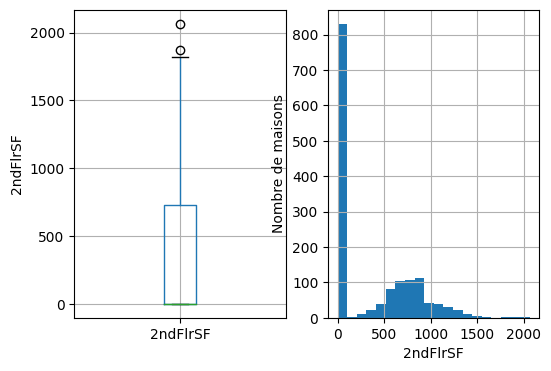

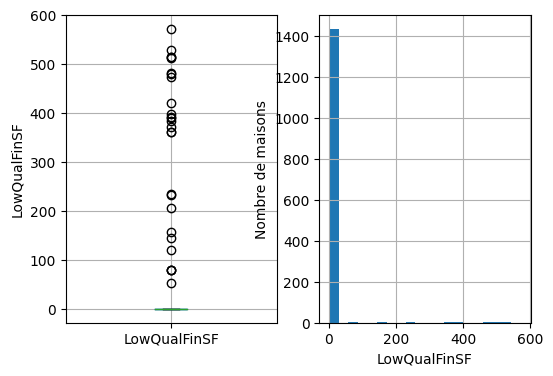

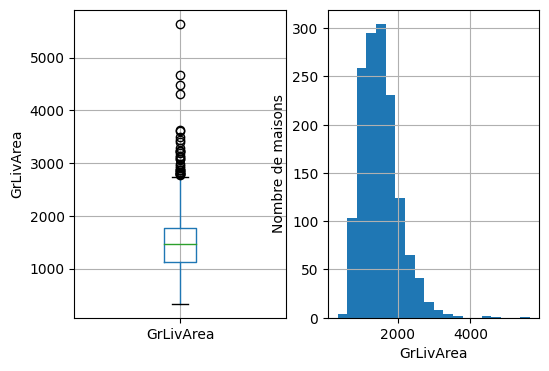

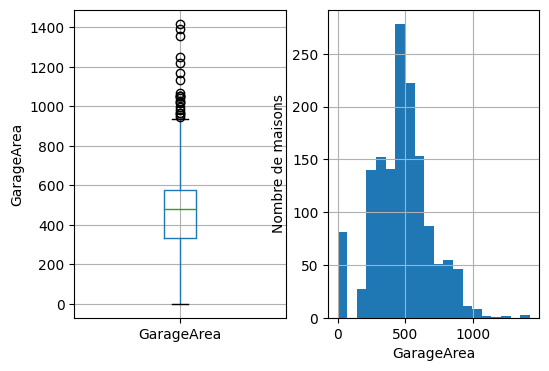

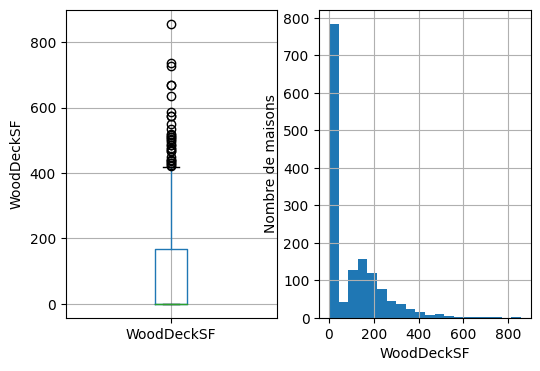

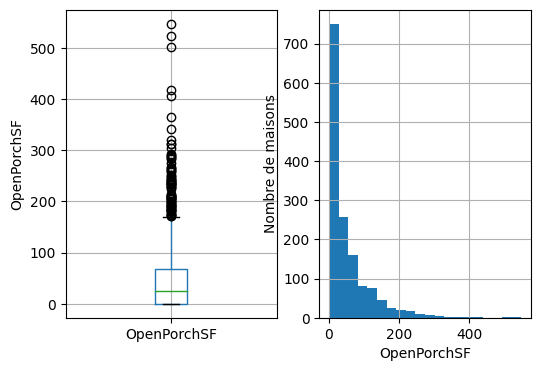

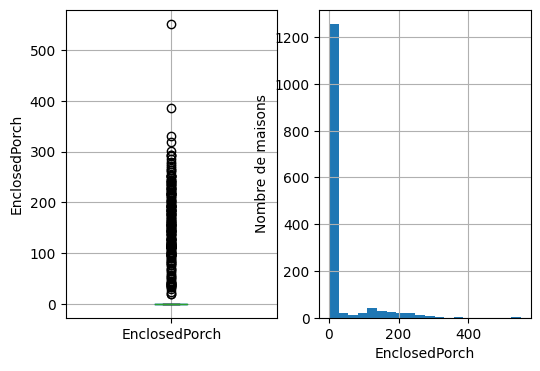

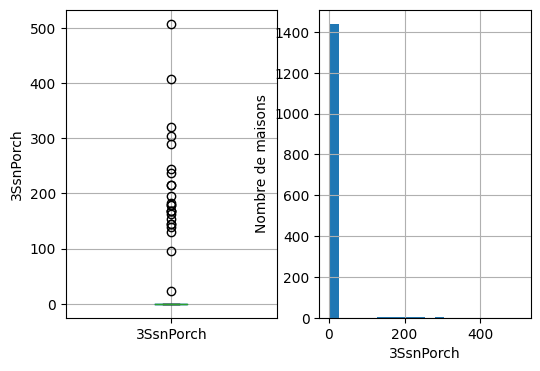

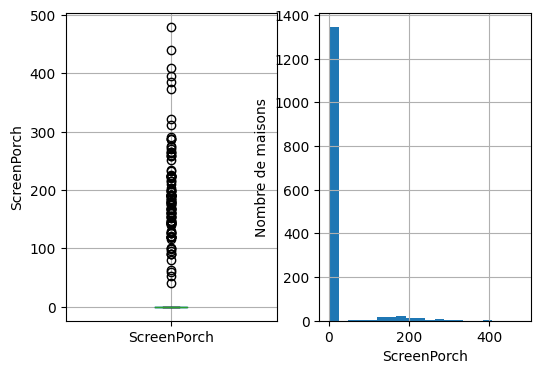

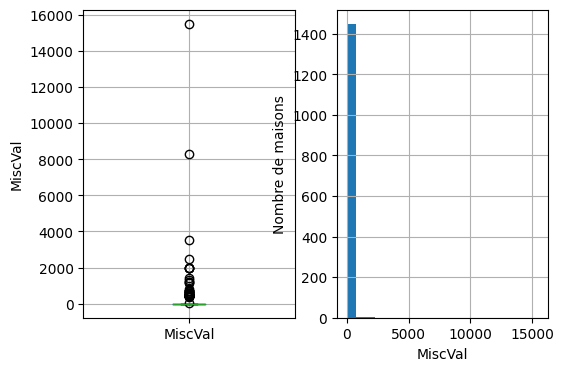

In [12]:
# outliers et distribution
# faisons des boîtes à moustaches pour visualiser les valeurs aberrantes dans les variables continues
# et histogrammes pour avoir une idée de la distribution

for var in numerical:
    plt.figure(figsize=(6,4))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('Nombre de maisons')
    fig.set_xlabel(var)

    plt.show()

/tmp/ipykernel_513040/2179831485.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()


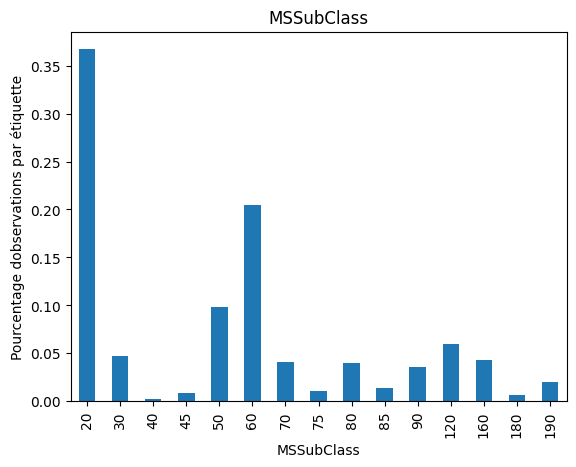

/tmp/ipykernel_513040/2179831485.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()


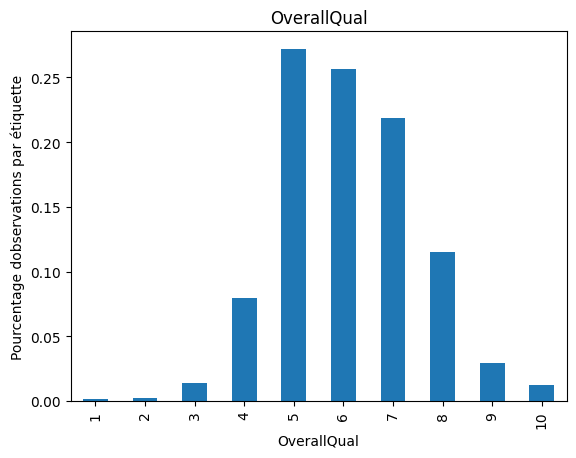

/tmp/ipykernel_513040/2179831485.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()


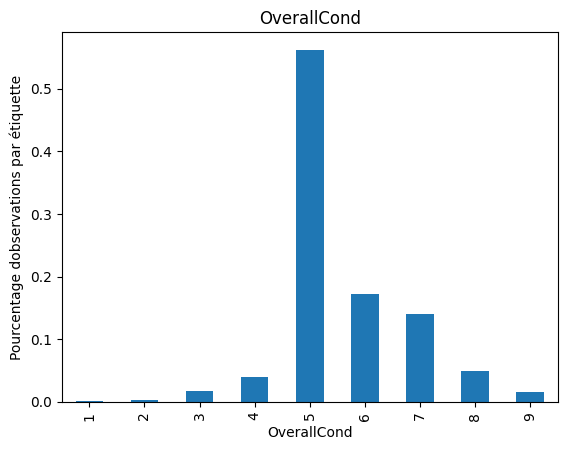

/tmp/ipykernel_513040/2179831485.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()


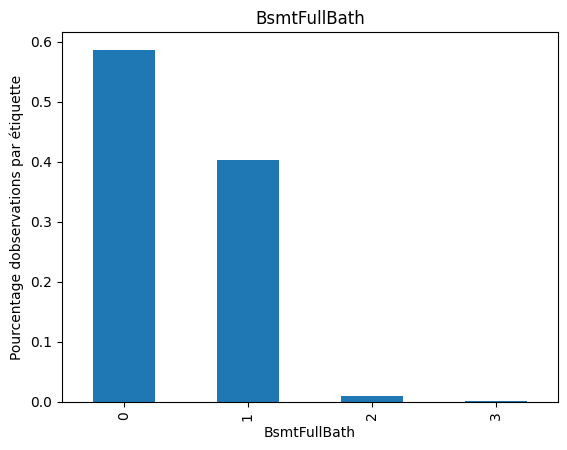

/tmp/ipykernel_513040/2179831485.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()


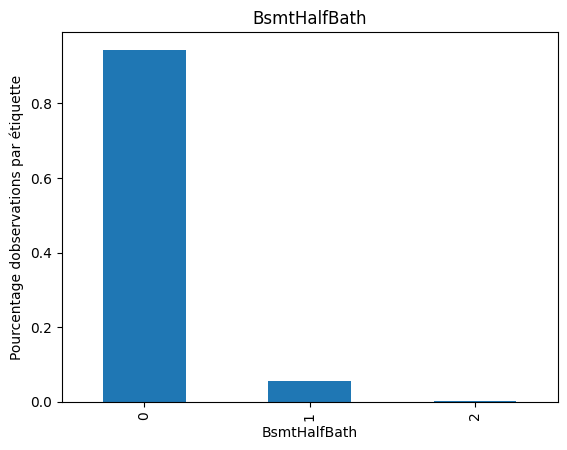

/tmp/ipykernel_513040/2179831485.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()


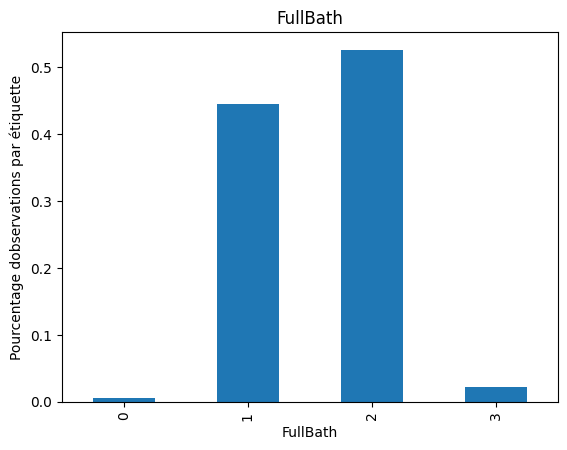

/tmp/ipykernel_513040/2179831485.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()


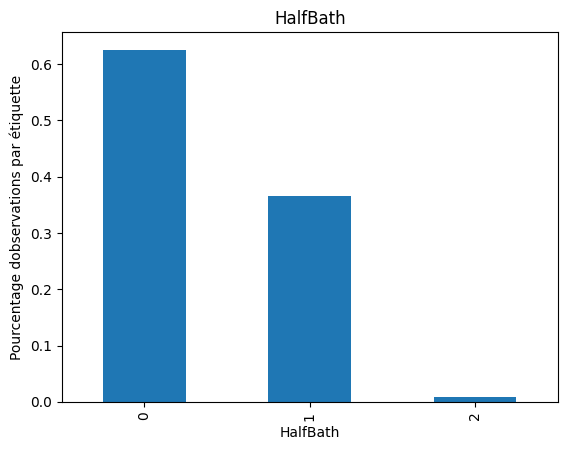

/tmp/ipykernel_513040/2179831485.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()


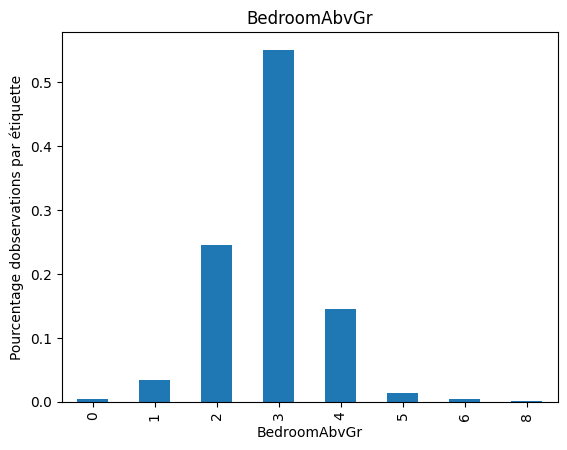

/tmp/ipykernel_513040/2179831485.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()


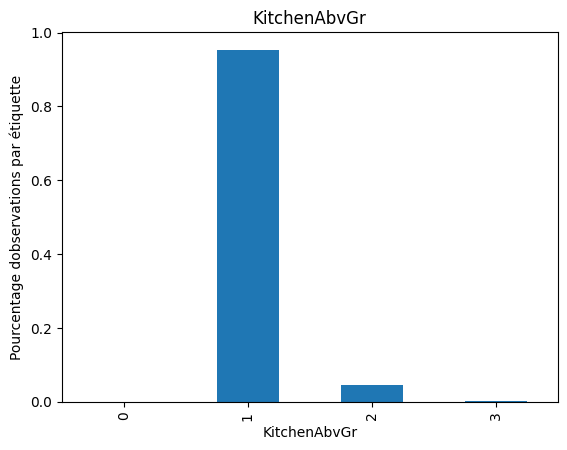

/tmp/ipykernel_513040/2179831485.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()


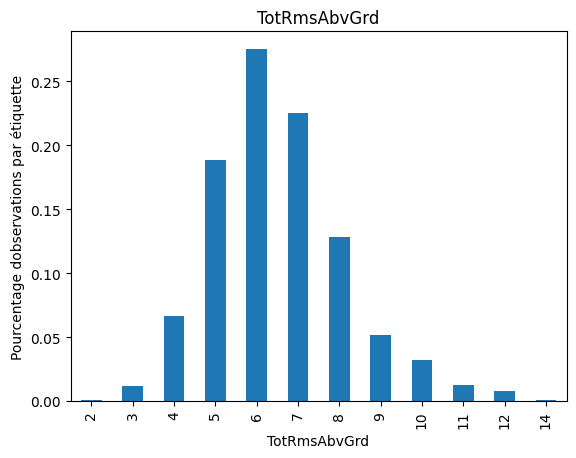

/tmp/ipykernel_513040/2179831485.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()


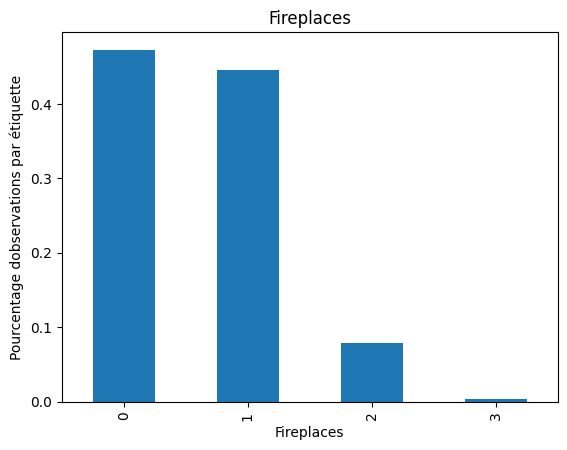

/tmp/ipykernel_513040/2179831485.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()


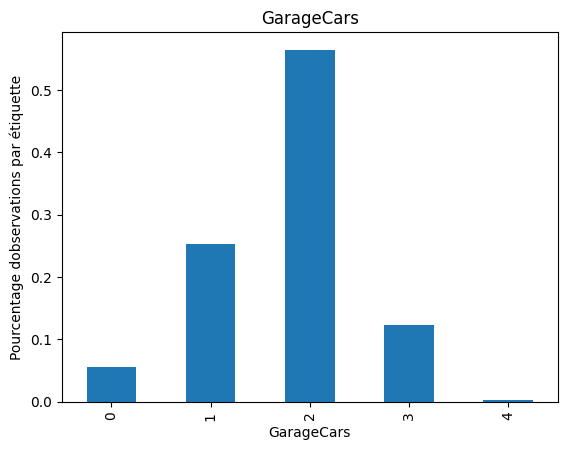

/tmp/ipykernel_513040/2179831485.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()


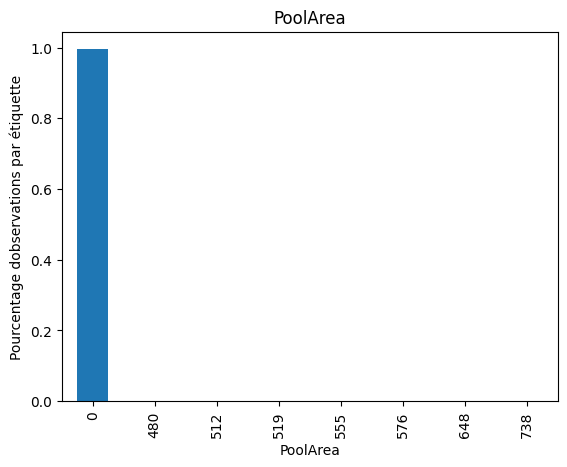

/tmp/ipykernel_513040/2179831485.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()


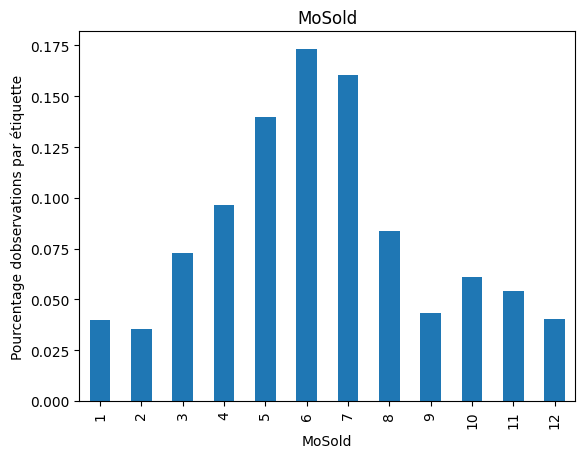

In [13]:
## outliers dans les variables discrètes

# valeurs aberrantes dans les variables discrètes

for var in discrete:
    (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()
    plt.ylabel('Pourcentage d''observations par étiquette')
    plt.title(var)
    plt.show()

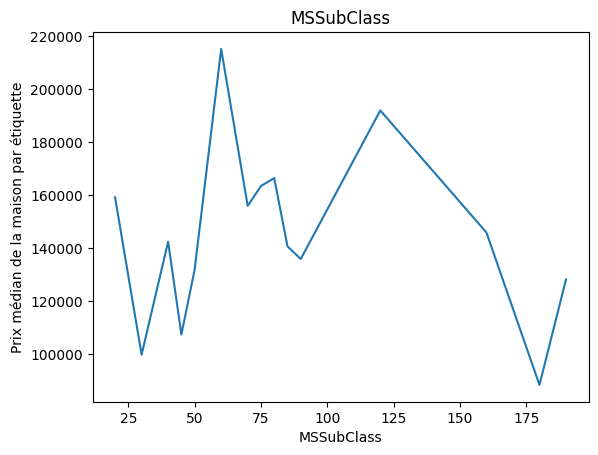

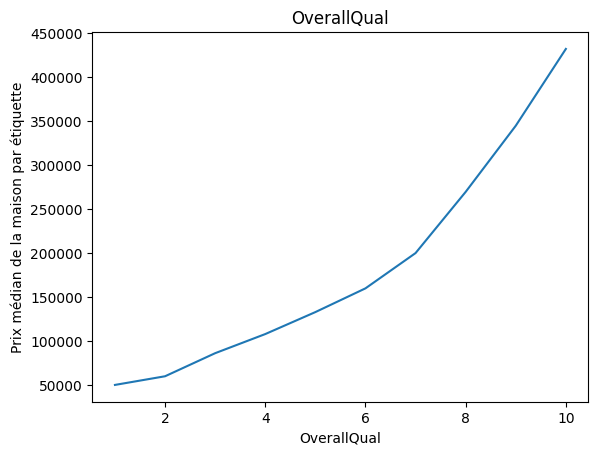

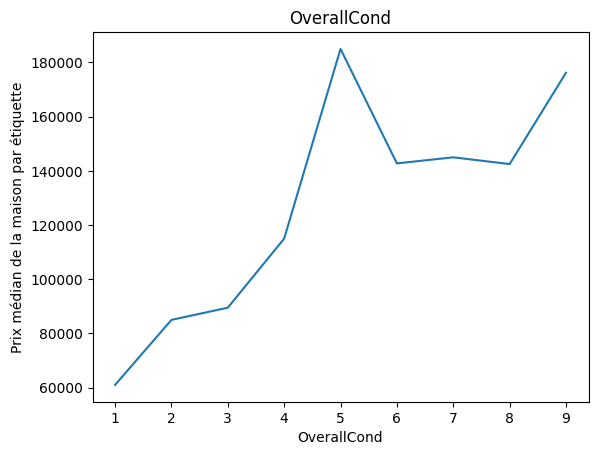

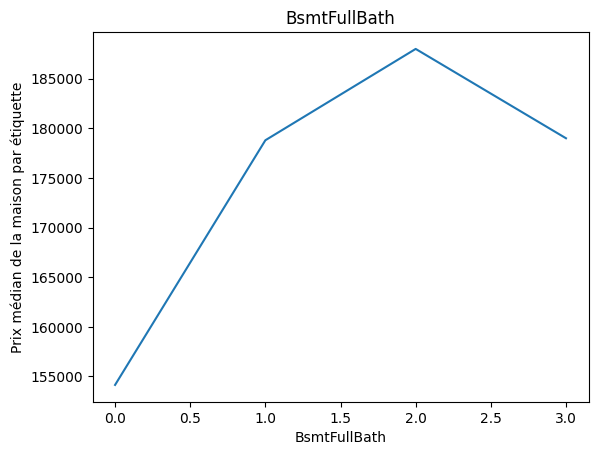

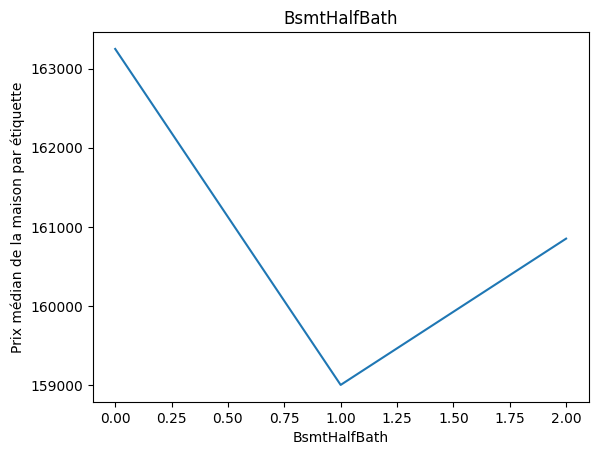

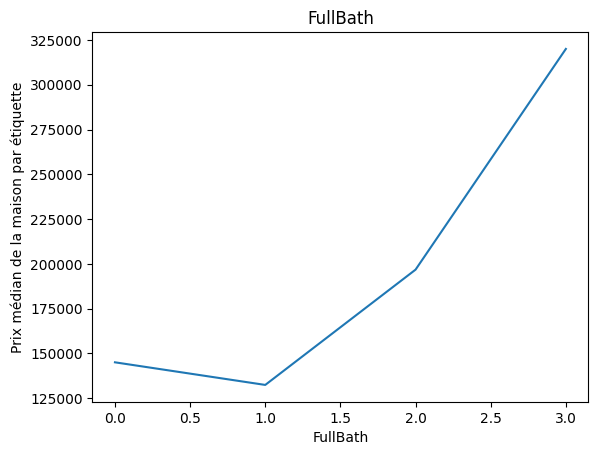

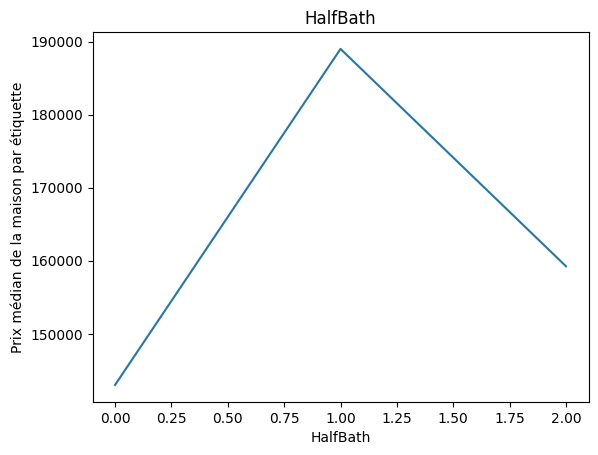

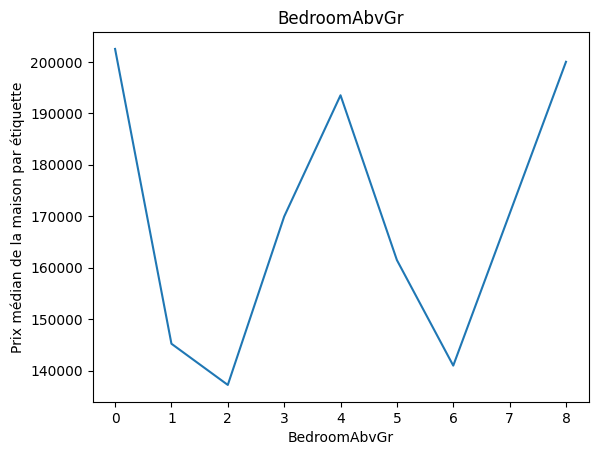

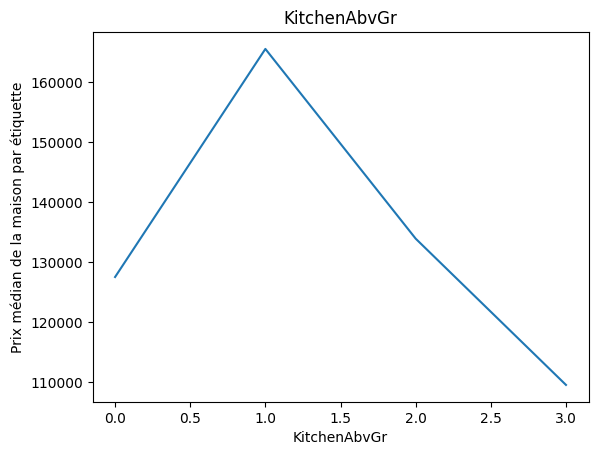

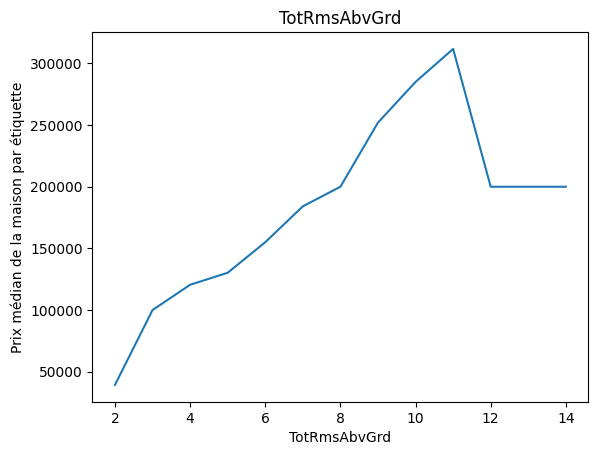

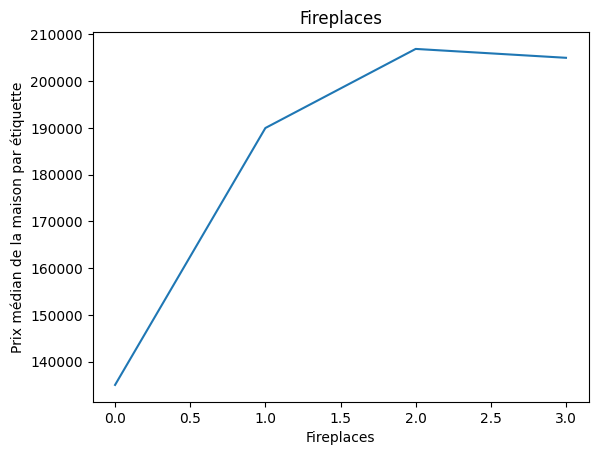

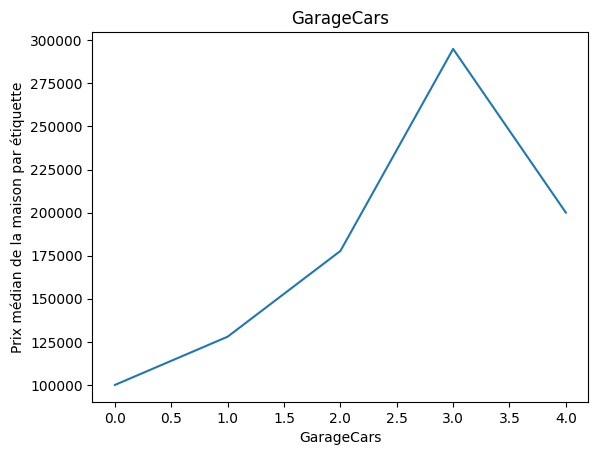

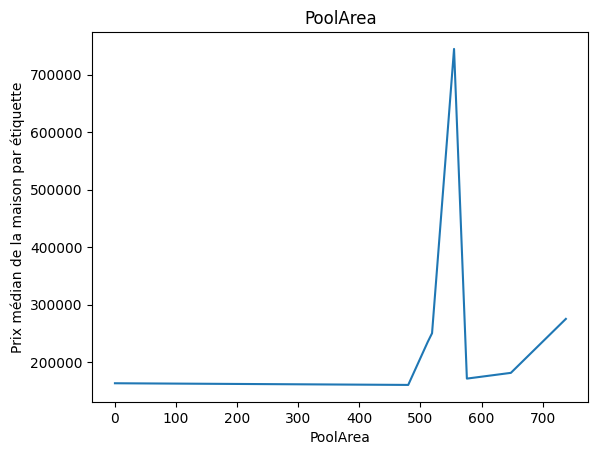

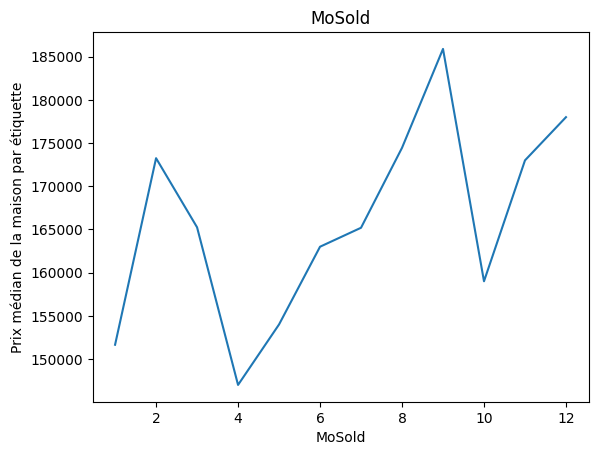

In [14]:
## Monotonicité entre les variables discrètes et les valeurs cible
for var in discrete:
    data.groupby(var)['SalePrice'].median().plot()
    plt.ylabel('Prix médian de la maison par étiquette')
    plt.title(var)
    plt.show()

Text(0, 0.5, 'Nombre de catégories ')

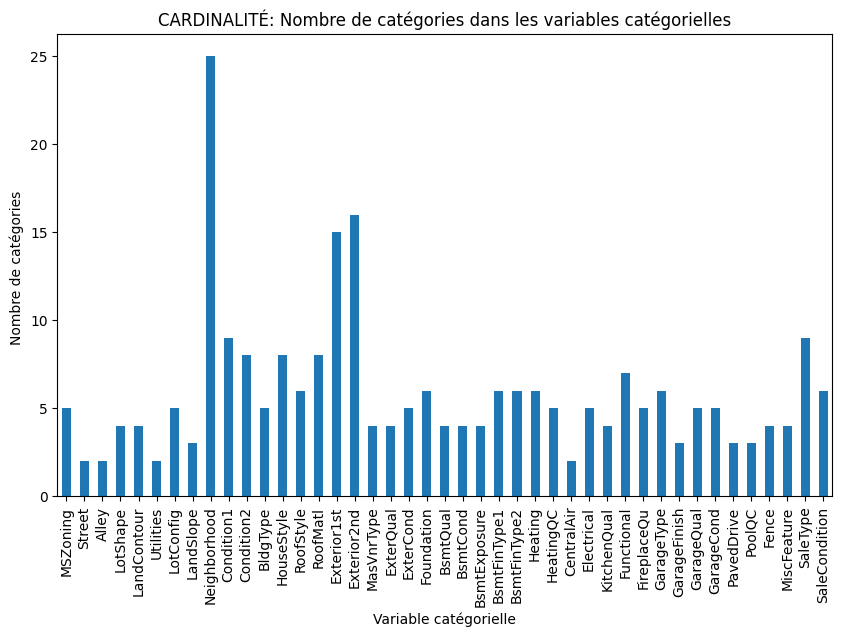

In [15]:
# tracer le nombre de catégories par variable catégorielle

data[categorical].nunique().plot.bar(figsize=(10,6))
plt.title('CARDINALITÉ: Nombre de catégories dans les variables catégorielles')
plt.xlabel('Variable catégorielle')
plt.ylabel('Nombre de catégories ')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Id', 'SalePrice'], axis=1),
                                                    data['SalePrice'],
                                                    test_size=0.1,
                                                    random_state=0)

X_train.shape, X_test.shape

((1314, 79), (146, 79))

In [16]:
## Variables temporelles

# fonction pour calculer le temps écoulé( durée)

def elapsed_years(df, var):
    #la différence entre la variable d'année et
     # année où la maison a été vendue
    
    df[var] = df['YrSold'] - df[var]
    return df

In [19]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [20]:
X_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
930,2,2,2.0
656,49,2,49.0
45,5,5,5.0
1348,9,9,9.0
55,44,44,44.0


In [21]:
## Au lieu de «l'année», nous avons maintenant le nombre d'années depuis que la maison a été construite ou rénovée et la maison a été vendue. Ensuite, nous supprimons la variable YrSold de l'ensembles de données, car nous 
## avons déjà extrait sa valeur.
# drop YrSold
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)

In [22]:
# les noms de colonnes pour une utilisation ultérieure 
final_columns = X_train.columns

In [23]:
## Imputation des données manquantes
## Variables continues
# afficher des variables avec des données manquantes
# gardez à l'esprit que maintenant que nous avons créé ces nouvelles variables temporelles, nous
# vont les traiter comme numériques et continus:

# supprimer YrSold de la liste des variables
# parce qu'il ne fait plus partie de notre ensemble de données
year_vars.remove('YrSold')

# examiner le pourcentage de valeurs manquantes
for col in numerical+year_vars:
    if X_train[col].isnull().mean() > 0:
        print(col, X_train[col].isnull().mean())

LotFrontage 0.17732115677321156
MasVnrArea 0.0045662100456621
GarageYrBlt 0.0563165905631659


In [24]:
# afficher des variables avec des données manquantes

for col in categorical:
    if X_train[col].isnull().mean() > 0:
        print(col, X_train[col].isnull().mean())

Alley 0.9383561643835616
MasVnrType 0.0045662100456621
BsmtQual 0.0243531202435312
BsmtCond 0.0243531202435312
BsmtExposure 0.02511415525114155
BsmtFinType1 0.0243531202435312
BsmtFinType2 0.02511415525114155
Electrical 0.00076103500761035
FireplaceQu 0.4726027397260274
GarageType 0.0563165905631659
GarageFinish 0.0563165905631659
GarageQual 0.0563165905631659
GarageCond 0.0563165905631659
PoolQC 0.9954337899543378
Fence 0.8143074581430746
MiscFeature 0.9611872146118722


In [32]:
import sys
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m  pip install -U feature_engine
!{sys.executable} -m  pip show feature_engine

Name: feature-engine
Version: 1.6.0
Summary: Feature engineering package with Scikit-learn's fit transform functionality
Home-page: http://github.com/feature-engine/feature_engine
Author: Soledad Galli
Author-email: solegalli@protonmail.com
License: BSD 3 clause
Location: /home/hadoop/.local/lib/python3.11/site-packages
Requires: numpy, pandas, scikit-learn, scipy, statsmodels
Required-by: 


### Pipeline

In [34]:
from feature_engine.imputation import  AddMissingIndicator, MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder
from feature_engine import discretisation as dsc
from sklearn.preprocessing import StandardScaler


In [25]:
# Je traiterai les variables discrètes comme si elles étaient catégoriques
# pour traiter les variables discretes comme catégoriel en utilisant Feature-engine
# nous devons les convertis  en objet
X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

In [36]:
house_pipe = Pipeline([

    # # imputation de données manquantes
    ('missing_ind', AddMissingIndicator(
        variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    ('imputer_num', MeanMedianImputer(imputation_method='median',
                                          variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    ('imputer_cat', CategoricalImputer(variables=categorical)),

    # encodage catégoriel
    ('rare_label_enc', RareLabelEncoder(
        tol=0.05, n_categories=6, variables=categorical+discrete)),
    ('categorical_enc', OrdinalEncoder(
        encoding_method='ordered', variables=categorical+discrete)),

    # discretisation + encoding
    ('discretisation', dsc.EqualFrequencyDiscretiser(
        q=5, return_object=True, variables=numerical)),
    ('encoding', OrdinalEncoder(
        encoding_method='ordered', variables=numerical)),

    # mise à l'échelle des fonctionnalités
    ('scaler', StandardScaler()),
    
    # regression
    ('lasso', Lasso(random_state=0))
])

In [37]:
# fit the pipeline
house_pipe.fit(X_train, y_train)

# predictions
X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)

/home/hadoop/.local/lib/python3.11/site-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable MSZoning is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Street is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Alley is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/hadoop/.local/lib/python3.11/site-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable LotShape is less than that indicated in n_cat

In [38]:
# un aperçu des valeurs de prédiction
X_train_preds

array([246672.4052138 , 161896.12892056, 293729.93370089, ...,
       101967.70191474, 210530.36056505, 234850.78615547])

In [39]:
# vérifier les performances du modèle:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 1035269885.2749029
train rmse: 32175.61009949777
train r2: 0.834193183650799

test mse: 2006905385.1371975
test rmse: 44798.497576784845
test r2: 0.7079639526659389


Text(0, 0.5, 'Predicted Price')

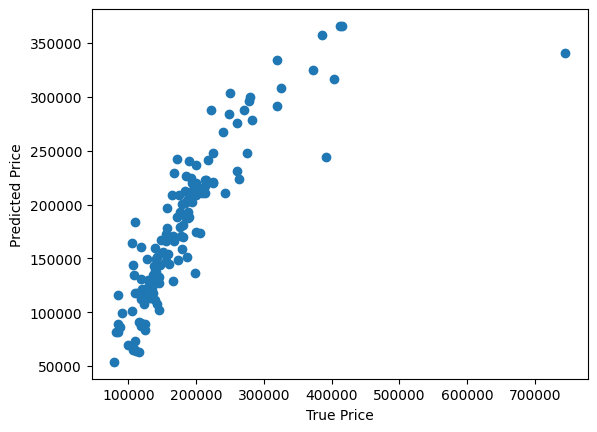

In [40]:
# plot predictions vs real value

plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

<AxesSubplot: >

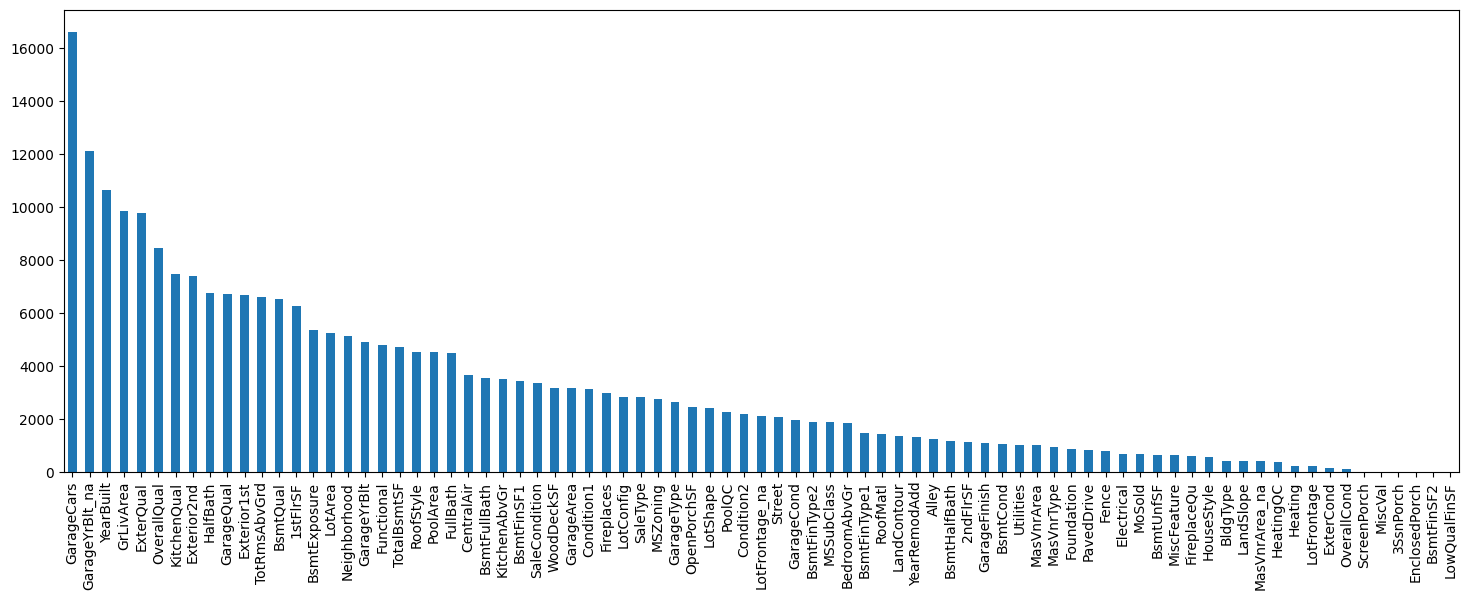

In [41]:
# explorons l'importance des fonctionnalités

importance = pd.Series(np.abs(house_pipe.named_steps['lasso'].coef_))
importance.index = list(final_columns)+['LotFrontage_na', 'MasVnrArea_na',  'GarageYrBlt_na']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))